# Проведение исследований с логистической и линейной регрессией

In [7]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Шаг 1: Загрузка данных
from sklearn.datasets import fetch_california_housing

# Используем "California Housing Dataset"
data = fetch_california_housing(as_frame=True)
housing_data = data['data']
housing_target = data['target']
housing_target_class = pd.cut(housing_target, bins=3, labels=["Доступное", "Среднее", "Дорогое"])

In [12]:
# Разделение данных для задач классификации и регрессии
X_class = housing_data
X_reg = housing_data
y_class = housing_target_class
y_reg = housing_target

# Разделение на обучающую и тестовую выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

## Базовая модель

Будем использовать логистическую регрессию для классификации и линейную регрессию для задачи регрессии.

In [13]:
# Шаг 2: Базовая модель
# Логистическая регрессия для классификации
logistic_reg = LogisticRegression(max_iter=10000)
logistic_reg.fit(X_train_class_scaled, y_train_class)

# Оценка качества классификации
y_pred_class = logistic_reg.predict(X_test_class_scaled)
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class, average='weighted')
print(f"Классификация (Логистическая регрессия): Accuracy = {accuracy:.4f}, F1 = {f1:.4f}")

# Линейная регрессия для задачи регрессии
linear_reg = LinearRegression()
linear_reg.fit(X_train_reg_scaled, y_train_reg)

# Оценка качества регрессии
y_pred_reg = linear_reg.predict(X_test_reg_scaled)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Регрессия (Линейная регрессия): MSE = {mse:.4f}")

Классификация (Логистическая регрессия): Accuracy = 0.7456, F1 = 0.7416
Регрессия (Линейная регрессия): MSE = 0.5559


#### Оптимизация гиперпараметров для классификации

In [19]:
# Шаг 3: Оптимизация гиперпараметров
# Для логистической регрессии
param_grid_class = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2']}
grid_class = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_class, scoring='f1_weighted', cv=7)
grid_class.fit(X_train_class_scaled, y_train_class)

best_logistic_reg = grid_class.best_estimator_
print(f"Лучшие параметры для логистической регрессии: {grid_class.best_params_}")

# Оценка оптимизированной модели классификации
y_pred_class_opt = best_logistic_reg.predict(X_test_class_scaled)
accuracy_opt = accuracy_score(y_test_class, y_pred_class_opt)
f1_opt = f1_score(y_test_class, y_pred_class_opt, average='weighted')
print(f"Оптимизированная классификация: Accuracy = {accuracy_opt:.4f}, F1 = {f1_opt:.4f}")

Лучшие параметры для логистической регрессии: {'C': 1000, 'penalty': 'l2'}
Оптимизированная классификация: Accuracy = 0.7469, F1 = 0.7428


#### Визуализация

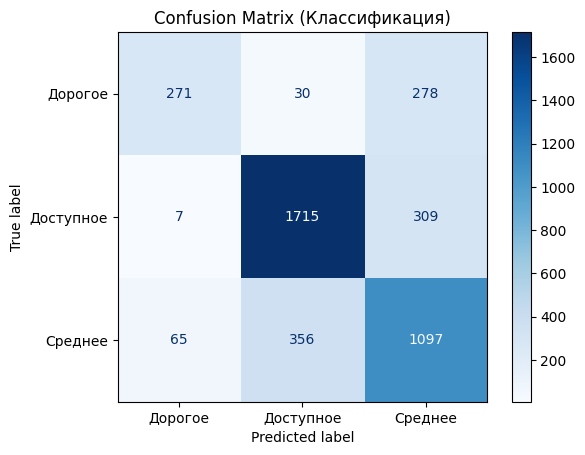

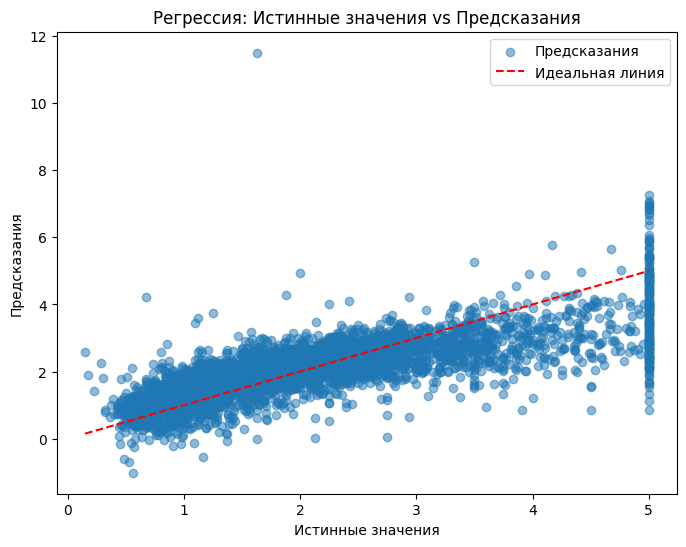

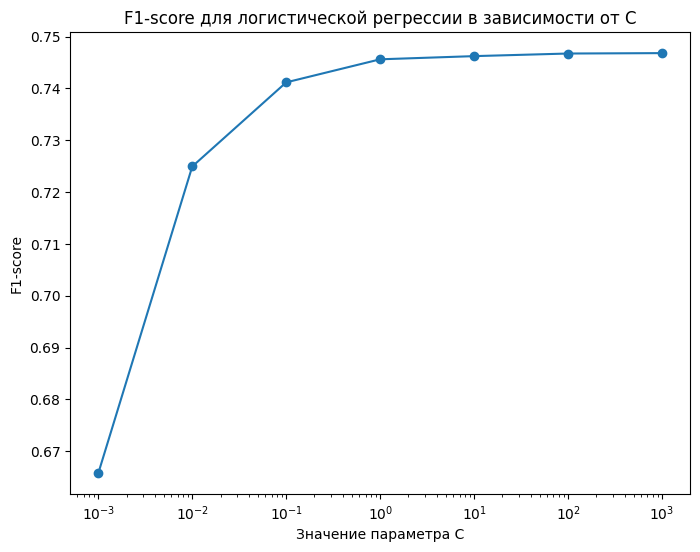

In [20]:
# Шаг 4: Визуализация результатов
# Классификация: Матрица путаницы
cm = confusion_matrix(y_test_class, y_pred_class_opt, labels=grid_class.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_class.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Классификация)")
plt.show()

# Регрессия: Истинные значения vs Предсказания
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, label="Предсказания")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', label="Идеальная линия")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")
plt.title("Регрессия: Истинные значения vs Предсказания")
plt.legend()
plt.show()

# Сравнение F1-score для классификации по значению параметра C
c_values = param_grid_class['C']
f1_scores = [grid_class.cv_results_['mean_test_score'][i] for i in range(len(c_values))]
plt.figure(figsize=(8, 6))
plt.plot(c_values, f1_scores, marker='o')
plt.xscale('log')
plt.xlabel("Значение параметра C")
plt.ylabel("F1-score")
plt.title("F1-score для логистической регрессии в зависимости от C")
plt.show()


####Оптимизация гиперпараметров для регрессии

Лучшие параметры для Ridge-регрессии: {'alpha': 0.1}
Оптимизированная Ridge-регрессия: MSE = 0.5559
Лучшие параметры для Lasso-регрессии: {'alpha': 0.01}
Оптимизированная Lasso-регрессия: MSE = 0.5483


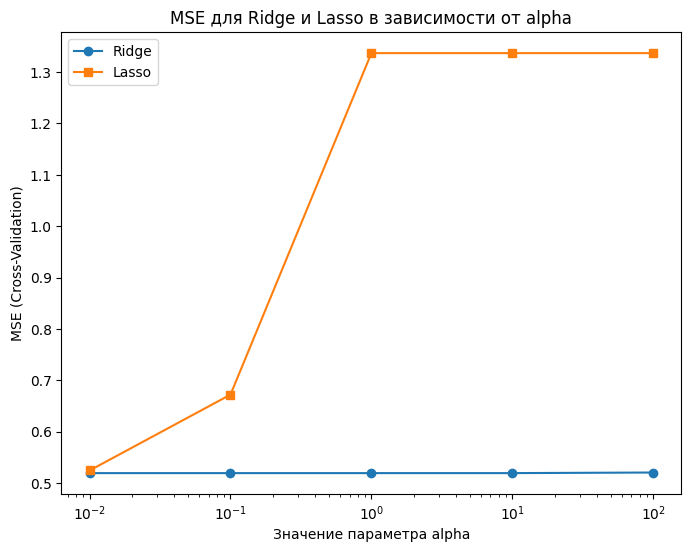

In [21]:
# Импорт необходимых библиотек
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Оптимизация гиперпараметров для Ridge-регрессии
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Гиперпараметр регуляризации
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_train_reg_scaled, y_train_reg)

best_ridge_reg = grid_ridge.best_estimator_
print(f"Лучшие параметры для Ridge-регрессии: {grid_ridge.best_params_}")

# Оценка качества Ridge-регрессии
y_pred_ridge = best_ridge_reg.predict(X_test_reg_scaled)
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
print(f"Оптимизированная Ridge-регрессия: MSE = {mse_ridge:.4f}")

# Оптимизация гиперпараметров для Lasso-регрессии
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Гиперпараметр регуляризации
grid_lasso = GridSearchCV(Lasso(max_iter=1000), param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_train_reg_scaled, y_train_reg)

best_lasso_reg = grid_lasso.best_estimator_
print(f"Лучшие параметры для Lasso-регрессии: {grid_lasso.best_params_}")

# Оценка качества Lasso-регрессии
y_pred_lasso = best_lasso_reg.predict(X_test_reg_scaled)
mse_lasso = mean_squared_error(y_test_reg, y_pred_lasso)
print(f"Оптимизированная Lasso-регрессия: MSE = {mse_lasso:.4f}")

# Визуализация результатов оптимизации гиперпараметров
ridge_alphas = param_grid_ridge['alpha']
ridge_scores = -1 * np.array(grid_ridge.cv_results_['mean_test_score'])

lasso_alphas = param_grid_lasso['alpha']
lasso_scores = -1 * np.array(grid_lasso.cv_results_['mean_test_score'])

plt.figure(figsize=(8, 6))
plt.plot(ridge_alphas, ridge_scores, marker='o', label='Ridge')
plt.plot(lasso_alphas, lasso_scores, marker='s', label='Lasso')
plt.xscale('log')
plt.xlabel("Значение параметра alpha")
plt.ylabel("MSE (Cross-Validation)")
plt.title("MSE для Ridge и Lasso в зависимости от alpha")
plt.legend()
plt.show()
